# Tennis Ace

This is a project from the [Codecademy](https://www.codecademy.com/learn) Data Science Career Path.

The objective of this project is to create a linear regression model that predicts the outcome for a tennis player based on their playing habits.

First, let's load and investigate the data which was provided in `tennis_stats.csv`.

In [92]:
import pandas as pd

tennis_stats = pd.read_csv('tennis_stats.csv')
tennis_stats

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Yann Marti,2010,0.41,0.66,0.23,0.45,0.50,1,0.75,8,...,0.23,0.36,12,0.67,0.45,0.53,0,1,9117,1062
1717,Mikhail Elgin,2012,0.41,0.60,0.30,0.36,0.60,3,0.60,13,...,0.33,0.43,10,0.40,0.45,0.46,16,20,89755,831
1718,Alexander Kudryavtsev,2012,0.40,0.64,0.21,0.42,0.42,4,0.25,13,...,0.07,0.29,14,0.57,0.40,0.51,0,1,44566,628
1719,Ivan Nedelko,2011,0.37,0.30,0.15,0.24,0.41,1,0.00,5,...,0.00,0.26,6,0.17,0.26,0.26,0,1,17527,264


This DataFrame contains information from players in the men's professional tennis league, the ATP, over the years 2009-2017. The columns contain offensive and defensive statistics along with outcomes and rankings.

We can start exploring the dataset by using a scatter plot to observe the relationship between two columns.

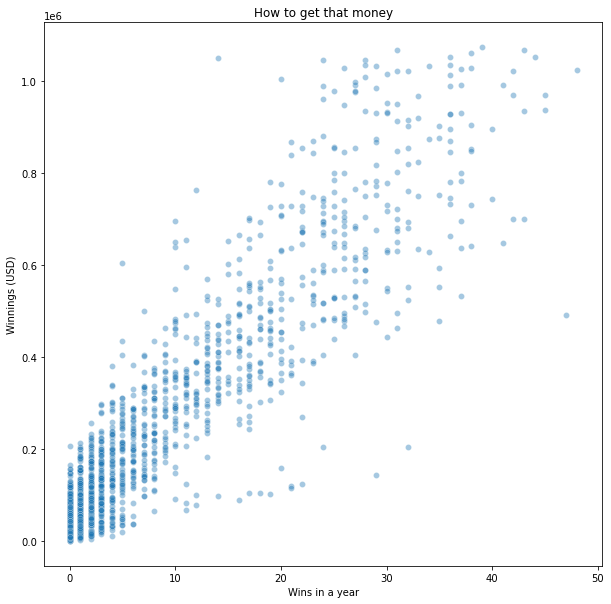

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=tennis_stats, x="Wins", y="Winnings", alpha=0.4)
ax.set(title="How to get that money", ylabel="Winnings (USD)", xlabel="Wins in a year")
plt.show()

It's not exactly a shock to find that there is a positive correlation between `Wins` and `Winnings`. I wouldn't win "Coach-of-the-Year" if my instruction to my aspiring athletes was simply: "Try to win more, then you'll make more money!"

Let's take a closer look at our data.

In [94]:
cols = tennis_stats.columns
num_cols = len(cols)
print(f"There are {num_cols} columns in the DataFrame.\nThese columns are:\n")
for col in cols:
    print(col)


There are 24 columns in the DataFrame.
These columns are:

Player
Year
FirstServe
FirstServePointsWon
FirstServeReturnPointsWon
SecondServePointsWon
SecondServeReturnPointsWon
Aces
BreakPointsConverted
BreakPointsFaced
BreakPointsOpportunities
BreakPointsSaved
DoubleFaults
ReturnGamesPlayed
ReturnGamesWon
ReturnPointsWon
ServiceGamesPlayed
ServiceGamesWon
TotalPointsWon
TotalServicePointsWon
Wins
Losses
Winnings
Ranking


The columns `FirstServe` through `TotalServicePointsWon` are all either offensive or defensive play statistics, while the last four columns are all outcome related. We'd like to know how our play can lead to the outcome we'd like. Since we're not trying to throw a match to get out of a gambling debt, let's go ahead and assume we are aiming to win.

Since there aren't **too** many features, we can try to visualize at a glance how each individually correlates to wins.

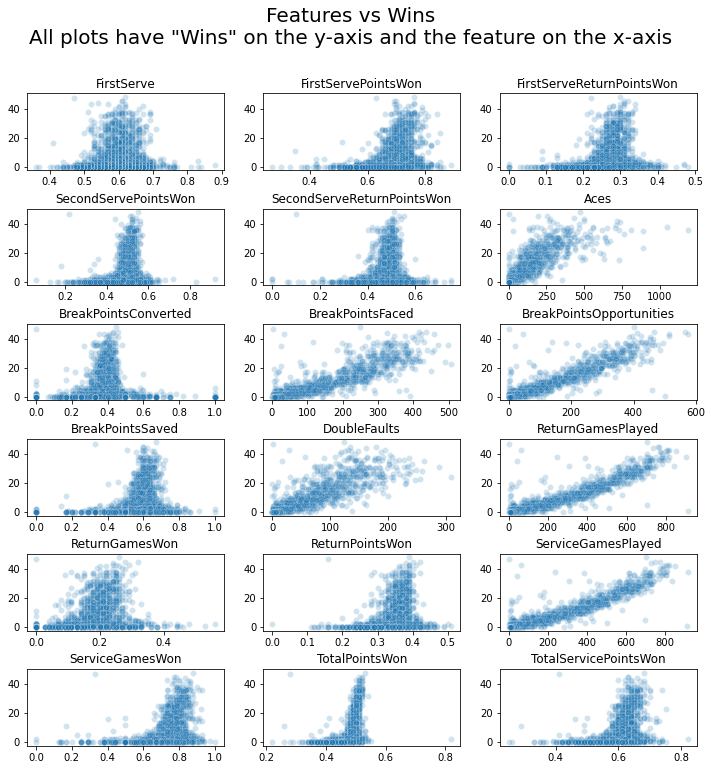

In [95]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Features vs Wins\nAll plots have "Wins" on the y-axis and the feature on the x-axis', fontsize=20)

for ax, name in zip(ax.flatten(), cols[2:20]):
    sns.scatterplot(ax=ax, data=tennis_stats, y="Wins", x=name, alpha=0.2)
    ax.set(title=name, xlabel='', ylabel='')

    

Looking through these scatter plots, we look first for trends moving up and to the right and we find a few of these, first we see `Aces` having this shape, which makes sense intuitively; if you are really good at serving, you are probably going to find yourself on the winning side of matches more often than not. 

But then we see some curiousities. Why do `BreakPointsFaced`, `BreakPointsOpportunites`, and even `DoubleFaults`, for example, seem to have a positive correlation with `Wins`? Is the secret to being a great tennis player just double faulting all the time?? It's not quite that easy. If I tried to do that, I wouldn't last long in (nor ever make it to) the ATP. And that's the point. In fact, I have never in my life lost an ATP tennis match, while Roger Federer has lost pleanty of times. The reason he keeps playing on the highest stage is that he also wins a lot. Quite a lot. A better metric for many of these features would be to divide the raw numbers by number of games or matches played. In fact, some of them already are normalized (`SecondServePointsWon`, for example is the % of opponents second-serve points the player was able to win). 

The full list of non-normalized features is:
* `Aces`
* `BreakPointsFaced`
* `BreakPointsOpportunities`
* `DoubleFaults`
* `ReturnGamesPlayed`
* `ServiceGamesPlayed`
    
For lack of better normlization options (such as dividing `Aces` by the total number of serves attempted), I will divide all of these features (except the last two) by total number of games played (the sum of the `ServiceGamesPlayed` and `ReturnGamesPlayed` columns). Then I will divide `ServiceGamesPlayed` and `ReturnGamesPlayed` each by `TotalMatches` (the sum of `Wins` and `Losses`.

In [96]:
tennis_stats['TotalGames'] = tennis_stats['ServiceGamesPlayed'] + tennis_stats['ReturnGamesPlayed']
to_be_normalized = ['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults']
new_col_names = ['NormAces', 'NormBreakPointsFaced', 'NormBreakPointsOpportunities', 'NormDoubleFaults']
for col, new_col in zip(to_be_normalized, new_col_names):
    tennis_stats[new_col] = tennis_stats[col]/tennis_stats['TotalGames']

tennis_stats['TotalMatches'] = tennis_stats['Wins'] + tennis_stats['Losses']
tennis_stats['TotalMatches'] = tennis_stats['TotalMatches'].replace(0,1)
tennis_stats['ReturnGamesPlayedPerMatch'] = tennis_stats['ReturnGamesPlayed']/tennis_stats['TotalMatches']
tennis_stats['ServiceGamesPlayedPerMatch'] = tennis_stats['ServiceGamesPlayed']/tennis_stats['TotalMatches']
tennis_stats.head(5)




,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,Winnings,Ranking,TotalGames,NormAces,NormBreakPointsFaced,NormBreakPointsOpportunities,NormDoubleFaults,TotalMatches,ReturnGamesPlayedPerMatch,ServiceGamesPlayedPerMatch
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,39820,119,17,0.000000,0.411765,0.411765,0.117647,3,3.0,2.666667
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,17334,381,18,0.388889,0.388889,0.000000,0.055556,1,9.0,9.000000
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,109827,119,36,0.055556,0.277778,0.222222,0.027778,5,3.8,3.400000
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,9761,125,29,0.068966,0.172414,0.206897,0.000000,1,14.0,15.000000
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,32879,272,5,0.200000,0.400000,0.000000,0.400000,1,3.0,2.000000


Now lets try plotting again

['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'BreakPointsConverted', 'BreakPointsSaved', 'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon', 'NormAces', 'NormBreakPointsFaced', 'NormBreakPointsOpportunities', 'NormDoubleFaults', 'ReturnGamesPlayedPerMatch', 'ServiceGamesPlayedPerMatch']


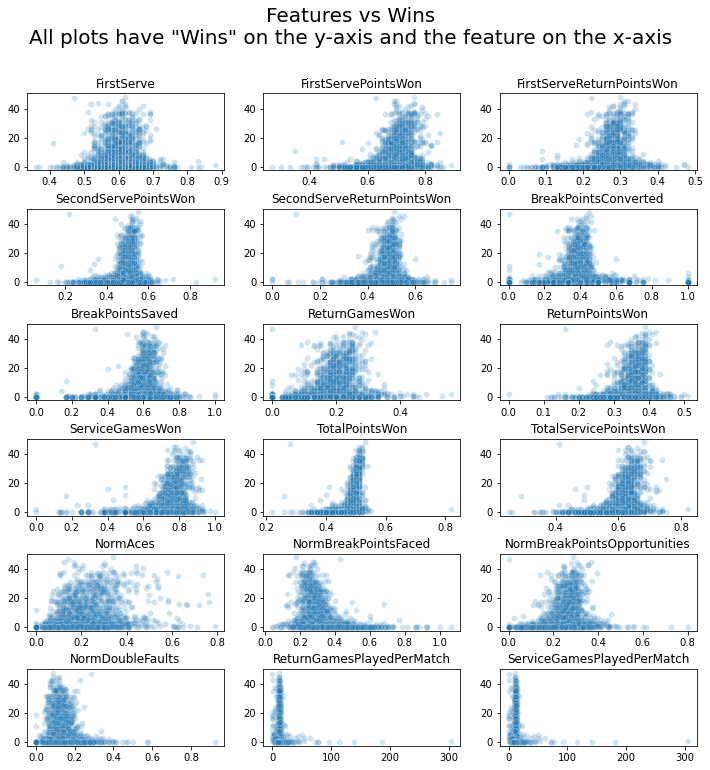

In [150]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Features vs Wins\nAll plots have "Wins" on the y-axis and the feature on the x-axis', fontsize=20)
cols = tennis_stats.columns.tolist()

cols_to_remove = ['Player', 'Year', 'Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed', 'Wins', 'Losses', 'Winnings', 'Ranking', 'TotalGames', 'TotalMatches']
for cm in cols_to_remove:
    cols.remove(cm)

for ax, name in zip(ax.flatten(), cols):
    sns.scatterplot(ax=ax, data=tennis_stats, y="Wins", x=name, alpha=0.2)
    ax.set(title=name, xlabel='', ylabel='')
    


Let's now take one of these features to train a linear regression model to predict `Wins` and see how it performs on some unseen data. I will choose `Aces` as the selected feature.

First, we will have to split the data into train and test sets.

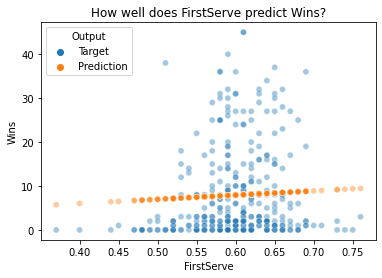

The R^2 score for this regression is: 0.0098


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

tennis_stats = tennis_stats.replace([np.inf, -np.inf], np.nan)
tennis_stats = tennis_stats.dropna()
features = tennis_stats[['FirstServe']]
target = tennis_stats[['Wins']]


features_train, features_test, target_train, target_test = train_test_split(features, target, train_size = 0.8)

model = LinearRegression()
model.fit(features_train, target_train)

test_score = model.score(features_test, target_test)
predictions = model.predict(features_test)
plot_df = pd.DataFrame()
plot_df['Feature'] = features_test['FirstServe']
plot_df['Target'] = target_test['Wins']
plot_df['Prediction'] = predictions

plot_df = plot_df.melt('Feature', var_name='Output', value_name='Wins')

ax = sns.scatterplot(data=plot_df, x="Feature", y="Wins", hue="Output", alpha=0.4)

ax.set(title="How well does FirstServe predict Wins?", xlabel="FirstServe")

plt.show()

print(f"The R^2 score for this regression is: {test_score:.4f}")

As could be expected, this is not a great predictor. Let's now try to create a multiple linear regression using all of the features displayed in the above plot. 

In [169]:
tennis_stats = tennis_stats.replace([np.inf, -np.inf], np.nan)
tennis_stats = tennis_stats.dropna()
features = tennis_stats[cols]
target = tennis_stats[['Wins']]

features_train, features_test, target_train, target_test = train_test_split(features, target, train_size = 0.8)

model = LinearRegression()
model.fit(features_train, target_train)

test_score = model.score(features_test, target_test)

print(f"The R^2 score for this regression is: {test_score:.4f}")

The R^2 score for this regression is: 0.2401


Clearly this is a much improved model, but still not great. Let's see what the coefficients of each variable are to determine which are most positively correlated with `Wins`.

In [177]:
coefs = model.coef_
coefs = coefs.reshape(-1,)
cols_coefs = zip(cols, coefs)
list(cols_coefs)

[('FirstServe', 10.287596998601908),
 ('FirstServePointsWon', 24.172924362595165),
 ('FirstServeReturnPointsWon', -9.109727347938765),
 ('SecondServePointsWon', 19.085825850950304),
 ('SecondServeReturnPointsWon', -6.456645954183426),
 ('BreakPointsConverted', -5.6844672555999525),
 ('BreakPointsSaved', 31.777387957335264),
 ('ReturnGamesWon', 37.77270158147721),
 ('ReturnPointsWon', 23.97362465717531),
 ('ServiceGamesWon', -45.77734882033498),
 ('TotalPointsWon', 6.44614329170398),
 ('TotalServicePointsWon', 12.296506698388493),
 ('NormAces', 10.116308178280104),
 ('NormBreakPointsFaced', -41.668358397616934),
 ('NormBreakPointsOpportunities', 2.0745051836839656),
 ('NormDoubleFaults', -4.89312542973609),
 ('ReturnGamesPlayedPerMatch', -1.3889121276382628),
 ('ServiceGamesPlayedPerMatch', 1.300119752916116)]

Looking though the above list, we see that
* Highly **Positively** Correlated with `Wins`
    * `FirstServePointsWon`
    * `BreakPointsConverted`
    * `ReturnGamesWon`
    * `ReturnPointsWon`
* Highly **Negativelys** Correlated with `Wins`
    * `ServiceGamesWon`
    * `NormBreakPointsFaced`

What can an aspiring tennis pro take from this? Defense is very important when it comes to winning tennis matches, and winning with your first serve can be a big boost.

Why is `ServiceGamesWon` negatively correlated? I noticed that when exploring the data there were some players with a very low number of matches played (and therefore matches won), but still with a significant number of other statistics such as `ServiceGamesWon`. I suspect what may have happened here with the data is that games, wins and losses were only counted from ATP tournaments, but that other stats such as `FirstServe` and `ServiceGamesWon` were recorded from all of their professional matches. If a player is borderline between ATP and lower-tier tournaments, they may appear to have a lot of decent stats (gained from lower competition) but not many ATP wins.

In [191]:
tennis_stats[tennis_stats["TotalMatches"] < 10]

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,Ranking,TotalGames,NormAces,NormBreakPointsFaced,NormBreakPointsOpportunities,NormDoubleFaults,TotalMatches,ReturnGamesPlayedPerMatch,ServiceGamesPlayedPerMatch,PercentLosses
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,119,17,0.000000,0.411765,0.411765,0.117647,3,3.00,2.666667,2.000000
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,119,36,0.055556,0.277778,0.222222,0.027778,5,3.80,3.400000,0.250000
10,Blaz Kavcic,2009,0.76,0.59,0.34,0.36,0.46,3,0.57,12,...,127,29,0.103448,0.413793,0.241379,0.034483,5,3.00,2.800000,0.666667
11,Ze Zhang,2010,0.76,0.71,0.27,0.28,0.47,11,0.25,10,...,248,31,0.354839,0.322581,0.258065,0.129032,5,3.20,3.000000,4.000000
18,Philipp Davydenko,2014,0.74,0.67,0.25,0.42,0.49,3,0.44,19,...,1071,50,0.060000,0.380000,0.180000,0.060000,2,13.00,12.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,Jesse Witten,2009,0.48,0.66,0.37,0.50,0.57,24,0.43,45,...,1055,126,0.190476,0.357143,0.428571,0.190476,4,15.75,15.750000,1.000000
1687,Dominic Thiem,2011,0.48,0.74,0.29,0.38,0.46,16,0.82,26,...,7,80,0.200000,0.325000,0.137500,0.137500,4,10.25,9.750000,3.000000
1694,Marco Trungelliti,2012,0.47,0.60,0.42,0.48,0.53,3,0.48,22,...,191,51,0.058824,0.431373,0.450980,0.176471,2,12.50,13.000000,1.000000
1704,Arthur De Greef,2015,0.45,0.63,0.30,0.54,0.38,9,0.50,12,...,287,49,0.183673,0.244898,0.204082,0.163265,2,12.50,12.000000,1.000000


As can be seen, there are 474 entries with less than 10 `TotalMatches`. And yet some of these players have over 100 total games! This seems to imply something was going on with the data colection that should be investigated further.
